# Caudales Albujón

In [1]:
import getpass
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import psycopg2
import pandas as pd
import pandas.io.sql as psql

In [2]:
%matplotlib widget

## Figure parameters

In [3]:
# graphs size
# default size 6.4 * 4.8
default_ratio = 6.4/4.8
print('defult ratio', 6.4/default_ratio)
x_cm = 11
x_in = x_cm / 2.54
y_in = x_in / default_ratio
print('x in', x_in)

defult ratio 4.8
x in 4.330708661417323


In [4]:
plt.rc('figure', figsize=(x_in, y_in))
plt.rc('font', size=8)
plt.rc('axes', labelsize=8, titlesize= 9, grid=True)
plt.rc('axes.spines', right=False, top=False)
plt.rc('xtick', direction='out', top=False)
plt.rc('ytick', direction='out', right=False)
plt.rc('lines', linewidth=0.8, linestyle='-', marker='.', markersize=4)
plt.rc('legend', fontsize=8, framealpha=0.5, loc='best')

plt.subplots_adjust(hspace=0.1, bottom=0.16, top=0.87)
plt.close()
# mpl.rcdefaults()

# plt.figure(dpi=80)

## Database

In [5]:
db = getpass.getpass('DB: ')
user = getpass.getpass('User: ')
passw = getpass.getpass('Password: ')

DB:  ···
User:  ········
Password:  ··


In [6]:
con = psycopg2.connect(database=db, user=user, password=passw)
cur = con.cursor()

## Functions

In [25]:
def subplot_1(x, y, str_title, str_ylabel, close_plt=True ):
    if close_plt:
        plt.close()
    fig, ax = plt.subplots()
    fig.autofmt_xdate()
    ax.stem(x, y, markerfmt=' ', basefmt=' ')
    ax.set_title(str_title)
    plt.ylabel(str_ylabel)
    plt.tight_layout()
    plt.show()

In [116]:
def subplot_n(x, y, legends, str_title, str_ylabel, close_plt=True ):
    """
    x[[]], y[[]], str_ylabel[]: sequences same number of elements
    x[i], y[i]: sequences same number of element; x[i] date type
    """
    if close_plt:
        plt.close()
    n = len(x)
    fig, ax = plt.subplots(n, 1, sharex=True)
    fig.autofmt_xdate()
    fig.suptitle(str_title, fontsize=9)

    for i in range(n):
        if i==0:
            ax[i].stem(x[i], y[i], markerfmt=' ', basefmt=' ', label=legends[i])
        else:
            color = f'C{i:d}'
            ax[i].stem(x[i], y[i], color, markerfmt=' ', basefmt=' ', label=legends[i])
        ax[i].legend()
        ax[i].set(ylabel=str_ylabel[i])
    plt.tight_layout()
    plt.show()

## Data

### Desembocadura Albujón

In [ ]:
# desembocadura albujón
select = \
"""
select t.fecha::date fecha, (avg(t.v)) q
from saih.tsh t 
where id = '06a18' and t.var='q01'
group by t.fecha::date
order by t.fecha::date
"""

In [65]:
df_alb18 = psql.read_sql(select, con)
df_alb18.dtypes

fecha     object
q        float64
dtype: object

In [66]:
df_alb18.head()

,fecha,q
0,2021-01-12,0.183242
1,2021-01-13,0.184608
2,2021-01-14,0.177271
3,2021-01-15,0.174525
4,2021-01-16,0.172125


In [67]:
# numpy arrays
x_alb18 = df_alb18['fecha'].to_numpy()
y_alb18 = df_alb18['q'].to_numpy()
x_alb18[0:5]

array([datetime.date(2021, 1, 12), datetime.date(2021, 1, 13),
       datetime.date(2021, 1, 14), datetime.date(2021, 1, 15),
       datetime.date(2021, 1, 16)], dtype=object)

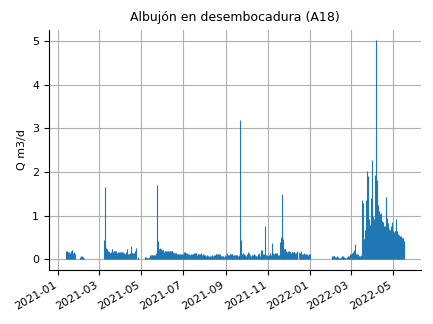

In [82]:
subplot_1(x_alb18, y_alb18, 'Albujón en desembocadura (A18)', 'Q m3/d')

### Albujón Marco de Control La Puebla A01

In [85]:
select_a01 = \
"""
select t.fecha::date fecha, t.v q
from saih.tsd t 
where id = '06a01' and t.var='q01' and t.fecha>='2021-01-01' and t.v>0
order by t.fecha::date
"""

In [86]:
df_alb01 = psql.read_sql(select_a01, con)
x_alb01 = df_alb01['fecha'].to_numpy()
y_alb01 = df_alb01['q'].to_numpy()

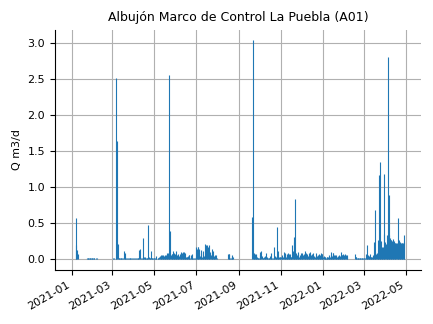

In [87]:
subplot_1(x_alb01, y_alb01, 'Albujón Marco de Control La Puebla (A01)', 'Q m3/d')

### Albujón en Pozo Estrecho A02

In [93]:
select_a02 = \
"""
select t.fecha::date fecha, t.v q
from saih.tsd t 
where id = '06a02' and t.var='q01' and t.fecha>='2021-01-01' and t.v >0
order by t.fecha::date
"""

In [94]:
df_alb02 = psql.read_sql(select_a02, con)
x_alb02 = df_alb02['fecha'].to_numpy()
y_alb02 = df_alb02['q'].to_numpy()

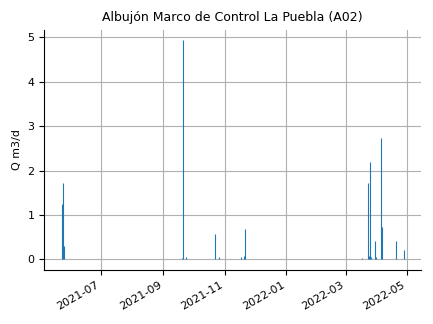

In [96]:
subplot_1(df_alb02['fecha'], df_alb02['q'], 'Albujón Marco de Control La Puebla (A02)', 'Q m3/d')

### Rambla de El Albujón en El Albujón A03

In [121]:
## El Albujón
select_a03 = \
"""
select t.fecha::date fecha, t.v q
from saih.tsd t 
where id = '06a03' and t.var='q01' and t.fecha>='2021-01-01' and t.v >0
order by t.fecha::date
"""

In [122]:
# El Albujón
df_alb03 = psql.read_sql(select_a03, con)

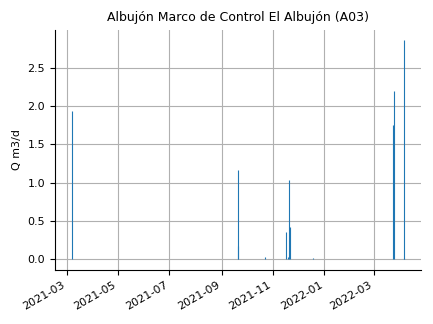

In [123]:
subplot_1(df_alb03['fecha'], df_alb03['q'], 'Albujón Marco de Control El Albujón (A03)', 'Q m3/d')

### Rambla de El Albujón en El Estrecho A04

In [124]:
select_a04 = \
"""
select t.fecha::date fecha, t.v q
from saih.tsd t 
where id = '06a04' and t.var='q01' and t.fecha>='2021-01-01' and t.v >0
order by t.fecha::date
"""

In [125]:
df_alb04 = psql.read_sql(select_a04, con)

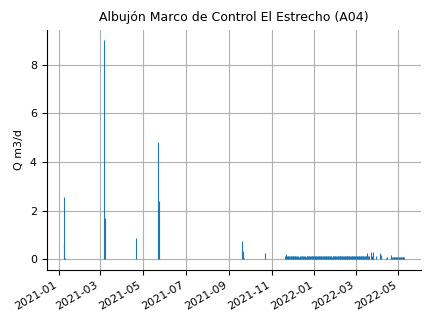

In [126]:
subplot_1(df_alb04['fecha'], df_alb04['q'], 'Albujón Marco de Control El Estrecho (A04)', 'Q m3/d')

### Rambla de El Albujón en Fuente Álamo 05

In [128]:
select = \
"""
select t.fecha::date fecha, t.v q
from saih.tsd t 
where id = '06a05' and t.var='q01' and t.fecha>='2021-01-01' and t.v >0
order by t.fecha::date
"""

In [129]:
df_alb05 = psql.read_sql(select, con)

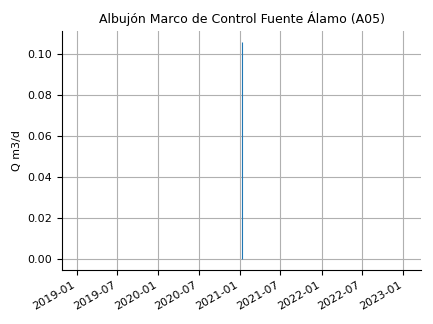

In [130]:
subplot_1(df_alb05['fecha'], df_alb05['q'], 'Albujón Marco de Control Fuente Álamo (A05)', 'Q m3/d')

### Pluviómetro Marco de control La Puebla 01

In [134]:
select = \
"""
select t.fecha , round(t.v::numeric, 1) p
from saih.tsd t
where t.id = '06a01' and t.var = 'p01' and t.v>0 and t.fecha>= '2021-01-01'
order by fecha
"""

In [135]:
df_a01_p = psql.read_sql(select, con)

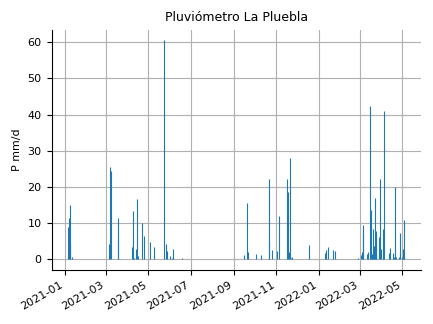

In [136]:
subplot_1(df_a01_p['fecha'], df_a01_p['p'], 'Pluviómetro La Pluebla', 'P mm/d')

### Pluviómetro Marco de Control El Estecho 04

In [142]:
select = \
"""
select t.fecha , round(t.v::numeric, 1) p
from saih.tsd t
where t.id = '06a04' and t.var = 'p01' and t.v>0 and t.fecha>= '2021-01-01'
order by fecha
"""

In [143]:
df_a04_p = psql.read_sql(select, con)

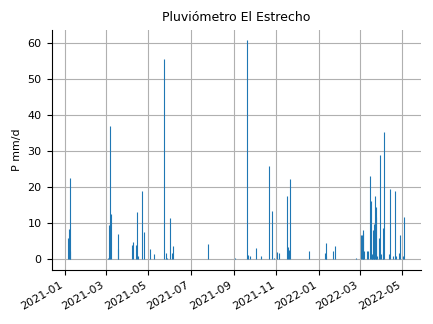

In [144]:
subplot_1(df_a04_p['fecha'], df_a04_p['p'], 'Pluviómetro El Estrecho', 'P mm/d')

### Temperatura Marco de Control La Puebla

In [102]:
select = \
"""
select t.fecha , round(t.v::numeric, 1) t
from saih.tsd t
where t.id = '06a01' and t.var = 'd05' and t.fecha>= '2021-01-01'
order by fecha
"""

In [103]:
df_a01_t = psql.read_sql(select, con)
xa01_t = df_a01_t['fecha'].to_numpy()
ya01_t = df_a01_t['t'].to_numpy()
xa01_t[0:5]

array([datetime.date(2021, 1, 1), datetime.date(2021, 1, 2),
       datetime.date(2021, 1, 3), datetime.date(2021, 1, 4),
       datetime.date(2021, 1, 5)], dtype=object)

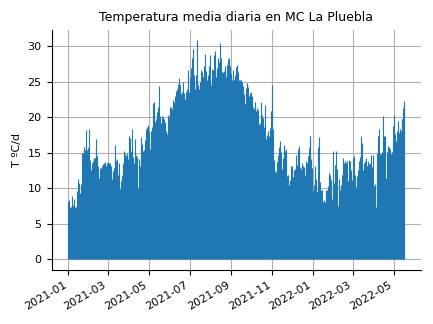

In [84]:
subplot_1(xa01_t, ya01_t, 'Temperatura media diaria en MC La Pluebla', 'T ºC/d')

## 2 subplots figures

### Albujón en desembocadura con pluviómetro

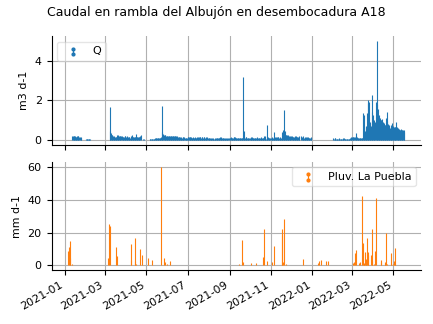

In [137]:
subplot_n([df_alb18['fecha'], df_a01_p['fecha']],
          [df_alb18['q'], df_a01_p['p']],
          ['Q', 'Pluv. La Puebla'],
          'Caudal en rambla del Albujón en desembocadura A18',
          ['m3 d-1', 'mm d-1'])

### Albujón en Pozo Estrecho con pluviómetro

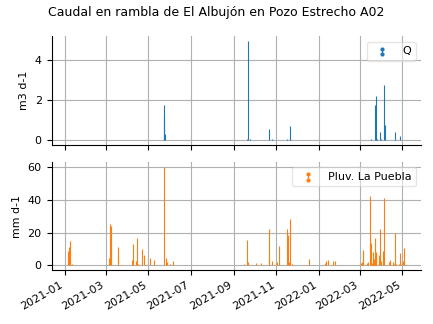

In [138]:
subplot_n([df_alb02['fecha'], df_a01_p['fecha']],
          [df_alb02['q'], df_a01_p['p']],
          ['Q', 'Pluv. La Puebla'],
          'Caudal en rambla de El Albujón en Pozo Estrecho A02',
          ['m3 d-1', 'mm d-1'], ['Q', 'Pluv. La Puebla'])

## 3 subplots figure

### Albujón desembocadura con pluviometía y temperatura

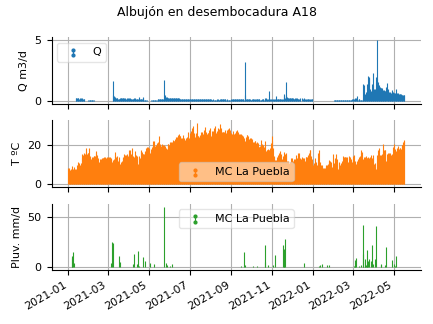

In [140]:
subplot_n([df_alb18['fecha'], df_a01_t['fecha'], df_a01_p['fecha']], 
          [df_alb18['q'], df_a01_t['t'], df_a01_p['p']],
           ['Q', 'MC La Puebla', 'MC La Puebla'],
          'Albujón en desembocadura A18',
          ['Q m3/d', 'T ºC', 'Pluv. mm/d'] )

In [106]:
# col object to date
df_alb18['fecha'] = pd.to_datetime(df_alb18['fecha'], format='%Y-%m-%d')
# df serie reciente
df_alb18_02 = df_alb18.query("fecha  >= '2022-03-01'")

In [107]:
print('Mediana periodo completo', np.median(df_alb18['q']))
print('Mediana desde marzo', np.median(df_alb18_02['q']))

Mediana periodo completo 0.12464583370213708
Mediana desde marzo 0.6960687500735123


In [62]:
df_alb18_02.tail()

,fecha,q
453,2022-05-13,0.486621
454,2022-05-14,0.483004
455,2022-05-15,0.479471
456,2022-05-16,0.478054
457,2022-05-17,0.418092


## Figures with several subplots

### figure serie Albujón con pluviómetros La Puebla y El Estrecho

In [145]:
# I modify figure size
x2_cm = 16
x2_in = x2_cm / 2.54
y2_in = x2_in / 1.33 
print('x2 in:', x2_in, 'y2_in:', y2_in)

x2 in: 6.299212598425196 y2_in: 4.736250074003907


In [146]:
plt.rc('figure', figsize=(x2_in, y2_in))
# plt.rc('font', size=8)
plt.rc('axes', labelsize=7, titlesize= 9, grid=True)
# plt.rc('axes.spines', right=False, top=False)
# plt.rc('xtick', direction='out', top=False)
# plt.rc('ytick', direction='out', right=False)
# plt.rc('lines', linewidth=0.8, linestyle='-', marker='.', markersize=4)
# plt.rc('legend', fontsize=8, framealpha=0.5, loc='best')

plt.subplots_adjust(hspace=0.05, bottom=0.16, top=0.87)
plt.close()


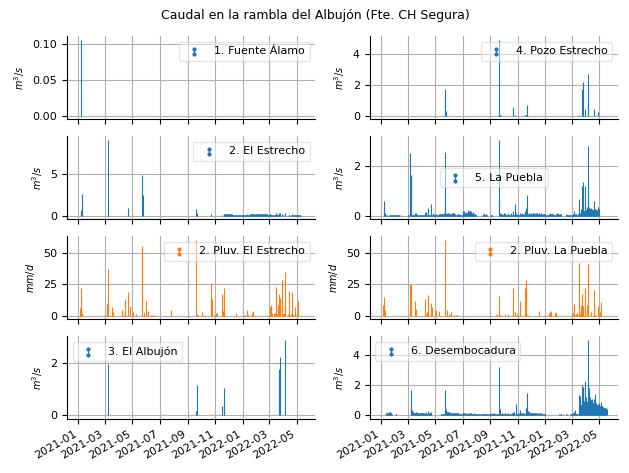

In [148]:
plt.close()
fig, axs = plt.subplots(4, 2, sharex=True)
fig.autofmt_xdate()
fig.suptitle('Caudal en la rambla del Albujón (Fte. CH Segura)', fontsize=9)

axs[0, 0].stem(df_alb05['fecha'], df_alb05['q'], markerfmt=' ', basefmt=' ', label="1. Fuente Álamo")
axs[0, 0].legend()
axs[0, 0].set(ylabel='$ m^3 / s $')

axs[1, 0].stem(df_alb04['fecha'], df_alb04['q'], markerfmt=' ', basefmt=' ', label="2. El Estrecho")
axs[1, 0].legend()
axs[1, 0].set(ylabel='$ m^3 / s $')

axs[2, 0].stem(df_a04_p['fecha'], df_a04_p['p'], 'C01', markerfmt=' ', basefmt=' ', label="2. Pluv. El Estrecho")
axs[2, 0].legend()
axs[2, 0].set(ylabel='$ mm / d $')

axs[3, 0].stem(df_alb03['fecha'], df_alb03['q'], markerfmt=' ', basefmt=' ', label="3. El Albujón")
axs[3, 0].legend()
axs[3, 0].set(ylabel='$ m^3 / s $')

axs[0, 1].stem(df_alb02['fecha'], df_alb02['q'], markerfmt=' ', basefmt=' ', label="4. Pozo Estrecho")
axs[0, 1].legend()
axs[0, 1].set(ylabel='$ m^3 / s $')

axs[1, 1].stem(df_alb01['fecha'], df_alb01['q'], markerfmt=' ', basefmt=' ', label="5. La Puebla")
axs[1, 1].legend()
axs[1, 1].set(ylabel='$ m^3 / s $')

axs[2, 1].stem(df_a01_p['fecha'], df_a01_p['p'], 'C01', markerfmt=' ', basefmt=' ', label="2. Pluv. La Puebla")
axs[2, 1].legend()
axs[2, 1].set(ylabel='$ mm / d $')

axs[3, 1].stem(df_alb18['fecha'], df_alb18['q'], markerfmt=' ', basefmt=' ', label="6. Desembocadura")
axs[3, 1].legend()
axs[3, 1].set(ylabel='$ m^3 / s $')

plt.tight_layout()
plt.show()

In [78]:
plt.close()